In [9]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
# Setting up the paths for the augmented image data
data_dir = 'C:/Users/HP/Desktop/FinalPro/augImg'
train_dir = 'C:/Users/HP/Desktop/FinalPro/trainData'
val_dir = 'C:/Users/HP/Desktop/FinalPro/valData'
test_dir = 'C:/Users/HP/Desktop/FinalPro/testData'

train_pct = 0.8
test_pct = 0.1

In [11]:
# Create folders for training, validation, and test data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [12]:
# Loop over the subdirectories in the data_dir
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Create subdirectories for training, validation, and test data
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Get the list of image files in this class directory
        images = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

        # Shuffle the list of image files
        random.shuffle(images)

        # Split image files into training, validation, and test sets
        train_index = int(len(images) * train_pct)
        val_index = int(len(images) * (train_pct + test_pct))
        train_images = images[:train_index]
        val_images = images[train_index:val_index]
        test_images = images[val_index:]
        
        # Copy the training images to subdirectory
        for image in train_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(train_class_dir, image)
            shutil.copy(src, dst)

        # Copy the validation images to subdirectory
        for image in val_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(val_class_dir, image)
            shutil.copy(src, dst)

        # Copy the test images to subdirectory
        for image in test_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(test_class_dir, image)
            shutil.copy(src, dst)

In [14]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
img_width, img_height = 224, 224
num_classes = 5


In [15]:
# Set the number of samples and batch size for training and validation
nb_train_samples = len(os.listdir(train_dir))
nb_validation_samples = len(os.listdir(val_dir))
nb_test_samples = len(os.listdir(test_dir))
#print(nb_test_samples)
batch_size = 16
input_shape = (28, 28, 1) # input shape

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 182 images belonging to 5 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 22 images belonging to 5 classes.


In [18]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 27 images belonging to 5 classes.


In [19]:
# CNN model architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 3), groups=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', groups=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', groups=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', groups=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))

In [20]:
# Compiling the model with loss function and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
train_steps = train_generator.samples // batch_size
val_steps = validation_generator.samples // batch_size

num_epochs = 10

In [22]:
history = model.fit(train_generator,
                    steps_per_epoch=train_steps,
                    epochs=num_epochs,
                    validation_data=validation_generator,
                    validation_steps=val_steps)

Epoch 1/10
11/11 [==============================] - 10s 889ms/step - loss: 1.7695 - accuracy: 0.4157 - val_loss: 1.4898 - val_accuracy: 0.6250
Epoch 2/10
11/11 [==============================] - 11s 1s/step - loss: 1.3462 - accuracy: 0.5602 - val_loss: 1.0984 - val_accuracy: 0.5000
Epoch 3/10
11/11 [==============================] - 12s 1s/step - loss: 1.0437 - accuracy: 0.5542 - val_loss: 0.8734 - val_accuracy: 0.6250
Epoch 4/10
11/11 [==============================] - 13s 1s/step - loss: 0.7783 - accuracy: 0.7169 - val_loss: 0.6981 - val_accuracy: 0.6875
Epoch 5/10
11/11 [==============================] - 12s 1s/step - loss: 0.5288 - accuracy: 0.7831 - val_loss: 0.3742 - val_accuracy: 0.8750
Epoch 6/10
11/11 [==============================] - 12s 1s/step - loss: 0.2818 - accuracy: 0.9277 - val_loss: 0.1465 - val_accuracy: 0.9375
Epoch 7/10
11/11 [==============================] - 12s 1s/step - loss: 0.1825 - accuracy: 0.9398 - val_loss: 0.0855 - val_accuracy: 0.9375
Epoch 8/10
11/11 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [25]:
# Saving the trained model to a file
model.save('C:/Users/HP/Desktop/FinalPro/CNN_model1.h5')

# Testing predictions on model

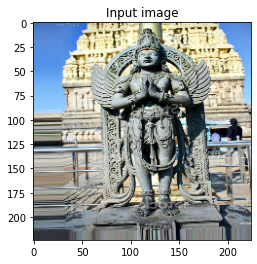

Predicted class: Garuda


In [33]:
# Define the predict function outside of any loops
@tf.function
def predict(model, img):
    return model(img)

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


# class names 
class_names = ['Garuda', 'Madanikas', 'Nandi','Narashimha','Vishnu']

# Load the trained model
model = tf.keras.models.load_model('C:/Users/HP/Desktop/FinalPro/CNN_model1.h5')

# Loading the new, unseen data
img_path = 'C:/Users/HP/Desktop/FinalPro/testData/Garuda/Garuda_Channakeshava_001_0_4396.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Preprocessing input image by resizing it to match the size of the images used for training
img = cv2.resize(img, (224, 224))

# Converting image to a numpy array and normalize the pixel values
img = np.array(img, dtype=np.float32) / 255.0

# Adding a batch dimension to the image, since model expects a batch of images
img = np.expand_dims(img, axis=0)

# Show the input image
plt.imshow(cv2.cvtColor(img.squeeze(), cv2.COLOR_BGR2RGB))
plt.title("Input image")
plt.show()

# prediction using the trained model
predictions = predict(model,img)

# Print predicted class label
predicted_label_index = np.argmax(predictions)
predicted_class = class_names[predicted_label_index]
print('Predicted class:', predicted_class)


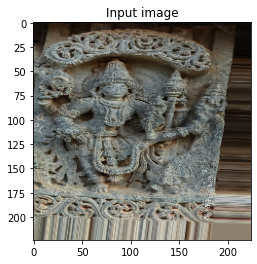

Predicted class: Vishnu

Temple name: Javagal Lakshmi Narashimha Temple

History: The Vishnu sculpture in the Javagal Lakshmi Narasimha Temple is famous for its intricate and detailed carvings, showcasing the Hindu god Vishnu in various forms and postures. The temple is believed to have been built in the 13th century during the Hoysala Empire and is known for its beautiful architecture and sculptures. The Vishnu sculpture in particular is regarded as a masterpiece and a testament to the skill and artistry of the sculptors of the Hoysala period.


In [50]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Define the predict function outside of any loops
@tf.function
def predict(model, img):
    return model(img)


# Define the class names
class_names = ['Garuda', 'Madanikas', 'Nandi', 'Narashimha', 'Vishnu']

# Load the trained model
model = tf.keras.models.load_model('C:/Users/HP/Desktop/FinalPro/CNN_model1.h5')

# Load the new, unseen data 
img_path = 'C:/Users/HP/Desktop/FinalPro/testData/Vishnu/Vishnu_Lakshminarasimha_004_0_6660.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

img = cv2.resize(img, (224, 224))
img = np.array(img, dtype=np.float32) / 255.0
img = np.expand_dims(img, axis=0)

# Show the input image
plt.imshow(cv2.cvtColor(img.squeeze(), cv2.COLOR_BGR2RGB))
plt.title("Input image")
plt.show()

# Make a prediction using the trained model
predictions = predict(model, img)

# Print the predicted class label
predicted_label_index = np.argmax(predictions)
predicted_class = class_names[predicted_label_index]
print('Predicted class:', predicted_class)

# Read the CSV file containing the sculpture details
df = pd.read_csv("C:/Users/HP/Desktop/FinalPro/sculpture_details.csv")

# Get the row containing details for the predicted class
predicted_sculpture_details = df[df['class_name'] == predicted_class].iloc[0]

# Print the temple name and history of the predicted sculpture class
print('\nTemple name:', predicted_sculpture_details['temple_name'])
print('\nHistory:', predicted_sculpture_details['history'])
